**Exercise 5: Stochastic Gradient Descent**

*CPSC 381/581: Machine Learning*

*Yale University*

*Instructor: Alex Wong*


**Prerequisites**:

1. Enable Google Colaboratory as an app on your Google Drive account

2. Create a new Google Colab notebook, this will also create a "Colab Notebooks" directory under "MyDrive" i.e.
```
/content/drive/MyDrive/Colab Notebooks
```

3. Create the following directory structure in your Google Drive
```
/content/drive/MyDrive/Colab Notebooks/CPSC 381-581: Machine Learning/Exercises
```

4. Move the 05_exercise_stochastic_gradient_descent.ipynb into
```
/content/drive/MyDrive/Colab Notebooks/CPSC 381-581: Machine Learning/Exercises
```
so that its absolute path is
```
/content/drive/MyDrive/Colab Notebooks/CPSC 381-581: Machine Learning/Exercises/05_exercise_stochastic_gradient_descent.ipynb
```

In this exercise, we will test stochastic gradient descent (SGD) and gradient descent (GD) for linear regression. We will plot out the loss of each model, test the models on training, validation, and testing sets, and benchmark their training time.


**Submission**:

1. Implement all TODOs in the code blocks below.

2. Report your training, and validation/testing scores.

```
Report validation and testing scores here.


```

3. List any collaborators.

```
Collaborators: Doe, Jane (Please write names in <Last Name, First Name> format)

Collaboration details: Discussed ... implementation details with Jane Doe.
```

Import packages

In [13]:
import numpy as np
import sklearn.datasets as skdata
import sklearn.metrics as skmetrics
import sklearn.preprocessing as skpreprocessing
from sklearn.linear_model import SGDRegressor
import time, warnings
import matplotlib.pyplot as plt

warnings.filterwarnings(action='ignore')
np.random.seed = 1

Define colors for display

In [14]:
# Create a list of colors for display
colors = [
    'tab:blue',
    'tab:green',
    'tab:red',
    'tab:orange',
    'tab:purple',
    'tab:brown',
    'tab:pink',
    'tab:gray',
    'tab:olive'
]

Override the partial_fit function

In [15]:
class SGDRegressorMSEVerbose(SGDRegressor):
    def __init__(self, *args, **kwargs):
        super().__init__(*args, **kwargs)

        # Define a list to hold loss values after each update
        self.__losses = []

    def partial_fit(self, X, y, sample_weight=None, do_logging=False):
        '''
        Performs a single update to the parameters

        Arg(s):
            X : numpy[float32]
                N x d feature vector
            y : numpy[float32]
                N targets
            sample_weight : numpy[float32]
                Weights applied to individual samples.
                If not provided, uniform weights are assumed.
                Set this to None
            do_logging : boolean
                If set to True then log the loss
        '''

        # Check if coefficients are allocated
        if getattr(self, "coef_", None) is None:

            # Allocate coefficients
            self._allocate_parameter_mem(
                n_classes=1,
                n_features=X.shape[1],
                input_dtype=X.dtype,
                coef_init=np.zeros([X.shape[1]]),
                intercept_init=self.fit_intercept,
                one_class=True)

            self.intercept_ = self.offset_

        # If we are logging
        if do_logging:
            # TODO: Make predictions on the training examples
            y_hat = self.predict(X)

            # TODO: Calculate loss (mean squared error)
            loss = skmetrics.mean_squared_error(y, y_hat)

            # TODO: Append loss to running loss
            self.__losses.append(loss)

        # TODO: Call partial_fit from parent class
        super().partial_fit(X, y, sample_weight)


    def get_losses(self):
        '''
        Fetches the list of loss values

        Returns:
            list[float] : list of loss values
        '''

        return self.__losses

Loading data

In [16]:
# Create a large-scale synthetic dataset
X, y = skdata.make_regression(n_samples=100000, n_features=100, noise=2)

dataset_name = 'synthetic regression dataset'

Define hyperparameters

In [17]:
# TODO: Set batch sizes to be 200, 500, 1000, 10000, 100000 (gradient descent)
dataset_batch_sizes = [
    200, 500, 1000, 10000, 100000
]

# TODO: Set learning schedules to be 'invscaling', 'invscaling', 'invscaling', 'invscaling', 'constant' (gradient descent)
dataset_learning_schedules = [
   'invscaling', 'invscaling', 'invscaling', 'invscaling', 'constant'
]

# Feel free to modify to gauge the behavior
learning_rate = 1e-3
max_iteration = 1000
logging_frequency = 10

Training and validation loop

----- learning rate: 0.0010  batch size: 200 time elapsed: 0.9262s -----
Training set mean squared error: 4.0164
Training set r-squared scores: 0.9999
Testing set mean squared error: 4.0557
Testing set r-squared scores: 0.9999
Testing set mean squared error: 4.1368
Testing set r-squared scores: 0.9998
----- learning rate: 0.0010  batch size: 500 time elapsed: 1.0744s -----
Training set mean squared error: 4.0462
Training set r-squared scores: 0.9999
Testing set mean squared error: 4.0342
Testing set r-squared scores: 0.9999
Testing set mean squared error: 3.8958
Testing set r-squared scores: 0.9999
----- learning rate: 0.0010  batch size: 1000 time elapsed: 1.2397s -----
Training set mean squared error: 4.0381
Training set r-squared scores: 0.9999
Testing set mean squared error: 3.9657
Testing set r-squared scores: 0.9999
Testing set mean squared error: 3.9874
Testing set r-squared scores: 0.9999
----- learning rate: 0.0010  batch size: 10000 time elapsed: 5.3335s -----
Training set me

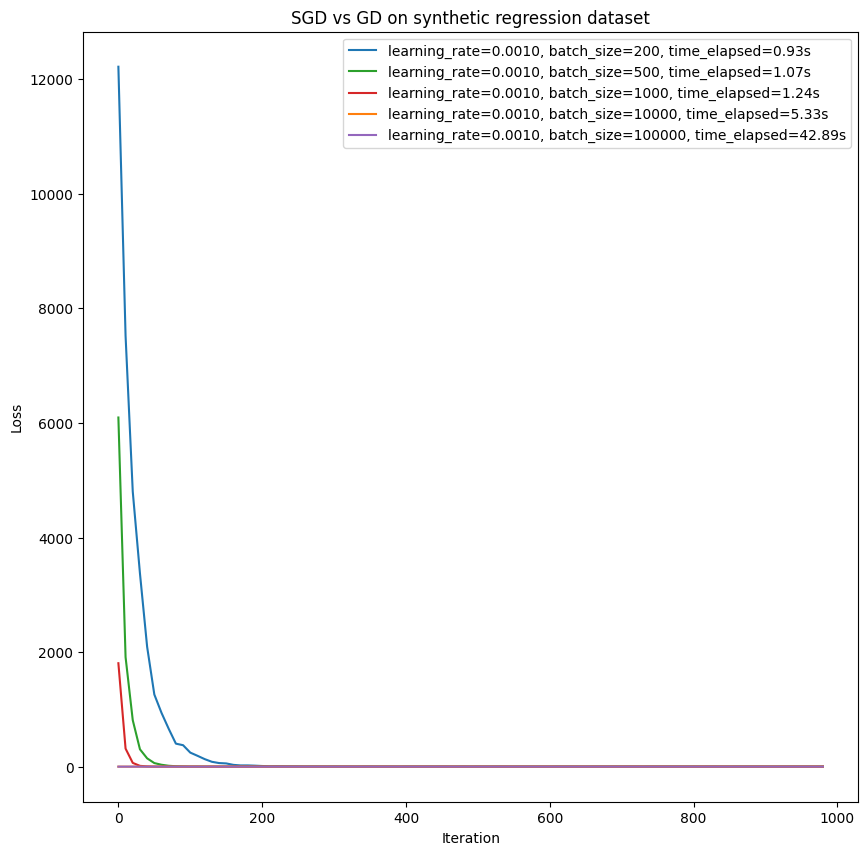

In [18]:
# Define a dictionary to hold losses
train_losses = {}

for batch_size, learning_schedule in zip(dataset_batch_sizes, dataset_learning_schedules):

    '''
    Create the training, validation and testing splits
    '''

    # Shuffle the dataset based on sample indices
    shuffled_indices = np.random.permutation(X.shape[0])

    # Choose the first 80% as training set, next 10% as validation and the rest as testing
    train_split_idx = int(0.80 * X.shape[0])
    val_split_idx = int(0.90 * X.shape[0])

    train_indices = shuffled_indices[0:train_split_idx]
    val_indices = shuffled_indices[train_split_idx:val_split_idx]
    test_indices = shuffled_indices[val_split_idx:]

    # Select the examples from X and y to construct our training, validation, testing sets
    X_train, y_train = X[train_indices, :], y[train_indices]
    X_val, y_val = X[val_indices, :], y[val_indices]
    X_test, y_test = X[test_indices, :], y[test_indices]

    '''
    Train and validate linear regression on each dataset
    '''
    # TODO: Instantiate linear regression model using SGDRegressorMSEVerbose with
    # loss='squared_error', penalty=None, alpha=0.0, learning_rate=learning_schedule, eta0=learning_rate
    model_scikit = SGDRegressorMSEVerbose(
        loss='squared_error',
        penalty=None,
        alpha=0.0,
        learning_rate=learning_schedule,
        eta0=learning_rate)

    # TODO: Mark the starting time
    time_start = time.time()

    # Iterate through the number of iterations
    for iteration in range(max_iteration):

        # TODO: Sample batch size number of examples from the training set
        batch_indices = np.random.permutation(X_train.shape[0])[0:batch_size]
        X_train_batch = X_train[batch_indices, :]
        y_train_batch = y_train[batch_indices]

        # TODO: Check if we will log
        do_logging = iteration > 0 and (iteration % logging_frequency == 0)

        # TODO: Perform a single update using the batch
        model_scikit.partial_fit(X_train_batch, y_train_batch, do_logging=do_logging)


    # TODO: Compute the time elapse
    time_elapsed = time.time() - time_start

    # TODO: Get losses logged within the model
    losses = model_scikit.get_losses()

    # TODO: Set losses as value to the key (learning_rate, batch_size, time_elapsed)
    train_losses[(learning_rate, batch_size, time_elapsed)] = losses


    print('----- learning rate: {:.4f}  batch size: {} time elapsed: {:.4f}s -----'.format(
        learning_rate, batch_size, time_elapsed))

    # TODO: Test model on training set
    predictions_train = model_scikit.predict(X_train)

    score_mse_train = skmetrics.mean_squared_error(y_train, predictions_train)
    print('Training set mean squared error: {:.4f}'.format(score_mse_train))

    score_r2_train = skmetrics.r2_score(y_train, predictions_train)
    print('Training set r-squared scores: {:.4f}'.format(score_r2_train))

    # TODO: Test model on validation set
    predictions_val = model_scikit.predict(X_val)

    score_mse_val = skmetrics.mean_squared_error(y_val, predictions_val)
    print('Testing set mean squared error: {:.4f}'.format(score_mse_val))

    score_r2_val = skmetrics.r2_score(y_val, predictions_val)
    print('Testing set r-squared scores: {:.4f}'.format(score_r2_val))

    # TODO: Test model on testing set
    predictions_test = model_scikit.predict(X_test)

    score_mse_test = skmetrics.mean_squared_error(y_test, predictions_test)
    print('Testing set mean squared error: {:.4f}'.format(score_mse_test))

    score_r2_test = skmetrics.r2_score(y_test, predictions_test)
    print('Testing set r-squared scores: {:.4f}'.format(score_r2_test))

# TODO: Create figure of figsize=(10, 10)
fig = plt.figure(figsize=(10, 10))
ax = plt.subplot(1, 1, 1)

# Iterate through losses
for (key, losses), c in zip(train_losses.items(), colors):

    # TODO: Unpack key as learning_rate, batch_size, time_elapsed
    learning_rate, batch_size, time_elapsed = key


    # TODO: Plot iterations (x-axis), losses (y-axis), with label of 'learning_rate={:.4f}, batch_size={}, time_elapsed={:.2f}s', and color c
    iterations = np.arange(0, len(losses)) * logging_frequency
    ax.plot(iterations, losses, label=f'learning_rate={learning_rate:.4f}, batch_size={batch_size}, time_elapsed={time_elapsed:.2f}s', color=c)
    pass


# TODO: Set title as 'SGD vs GD on synthetic regression dataset'

ax.set_title('SGD vs GD on synthetic regression dataset')
# TODO: Set xlabel as 'Iteration'
ax.set_xlabel('Iteration')
# TODO: Set ylabel as 'Loss'
ax.set_ylabel('Loss')
# TODO: Show legend
ax.legend()


# Show plots
plt.show()
